# Monte Carlo Simulation: Correlation Analysis

## Simulation Steps and Importance

In this notebook, we use **Monte Carlo simulations** to analyze the significance of correlations between **Mean Length of Sentence (MLS)**, **Complex Nominals per Clause (CN/C)**, and **ErrorToWordRatio**. The Monte Carlo method is a powerful statistical tool that allows us to assess whether observed correlations between these variables are statistically significant or could have occurred by chance.

### Interesting:

1. **MLS and ErrorToWordRatio (Group 1 - Arin and Engin)**:  
   - Observed Correlation: **-0.7894**  
   - P-Value: **0.0154**  
   The strong negative correlation is statistically significant, indicating a real relationship between high MLS and lower Error rate.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import detrend
from scipy.stats import pearsonr

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    
    # Loop over all columns and detrend if the column contains numeric data
    for col in df.columns:
        if col in columns_to_normalize:
            if np.issubdtype(df[col].dtype, np.number):  # Check if the column is numeric
                df_detrended[col] = detrend(df[col])
    
    # Normalize the columns to have values between 0 and 1
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    
    return df_detrended

# Columns to detrend and normalize: MLS, CN/C, ErrorToWordRatio
columns_to_normalize = ['MLS', 'CN_C', 'ErrorToWordRatio']

# Detrend and normalize all G1 dataframes
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]

# Detrend and normalize all G2 dataframes
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Assign individual detrended and normalized dataframes for G1
g1_arin_engin_df_detrended = g1_dataframes_detrended[0]
g1_aysen_sinem_df_detrended = g1_dataframes_detrended[1]
g1_cello_ezgi_df_detrended = g1_dataframes_detrended[2]
g1_dilara_sila_df_detrended = g1_dataframes_detrended[3]
g1_elanur_eceberfu_df_detrended = g1_dataframes_detrended[4]
g1_helin_senay_df_detrended = g1_dataframes_detrended[5]
g1_nupelda_eda_df_detrended = g1_dataframes_detrended[6]
g1_oyku_cahit_df_detrended = g1_dataframes_detrended[7]
g1_selin_zahide_df_detrended = g1_dataframes_detrended[8]
g1_umay_kubra_df_detrended = g1_dataframes_detrended[9]

# Assign individual detrended and normalized dataframes for G2
g2_abidin_osman_df_detrended = g2_dataframes_detrended[0]
g2_aleynaceren_df_detrended = g2_dataframes_detrended[1]
g2_ayse_halime_df_detrended = g2_dataframes_detrended[2]
g2_beyza_umur_df_detrended = g2_dataframes_detrended[3]
g2_ceren_mihriban_df_detrended = g2_dataframes_detrended[4]
g2_damla_sumeyye_df_detrended = g2_dataframes_detrended[5]
g2_fadime_sura_df_detrended = g2_dataframes_detrended[6]
g2_fatma_eren_df_detrended = g2_dataframes_detrended[7]
g2_songul_esma_df_detrended = g2_dataframes_detrended[8]
g2_zeynep_elif_df_detrended = g2_dataframes_detrended[9]

# Verify detrended and normalized dataframes are created
len(g1_dataframes_detrended), len(g2_dataframes_detrended)  # Should return 10 for each list


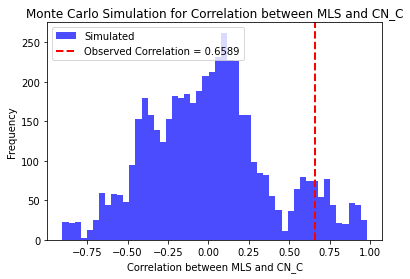

MLS and CN_C - Observed Correlation: 0.6589, P-Value: 0.1028


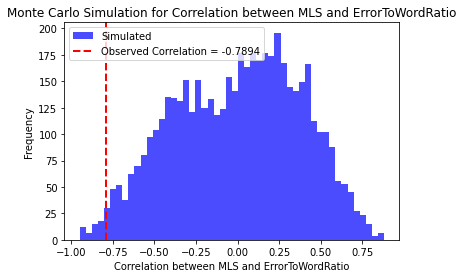

MLS and ErrorToWordRatio - Observed Correlation: -0.7894, P-Value: 0.0154


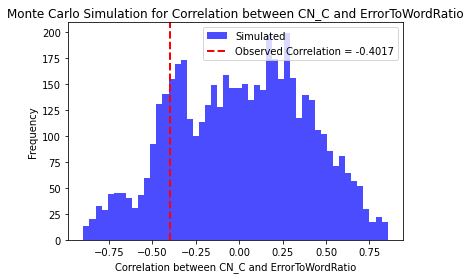

CN_C and ErrorToWordRatio - Observed Correlation: -0.4017, P-Value: 0.3244


In [2]:
# Monte Carlo simulation for correlation significance
def monte_carlo_correlation_simulation(df, col1, col2, num_simulations=5000):
    # Calculate the observed correlation
    observed_corr, _ = pearsonr(df[col1], df[col2])
    
    # Generate simulated correlations by shuffling the columns
    simulated_corrs = []
    for _ in range(num_simulations):
        shuffled_col1 = np.random.permutation(df[col1])
        simulated_corr, _ = pearsonr(shuffled_col1, df[col2])
        simulated_corrs.append(simulated_corr)
    
    # Calculate the p-value
    simulated_corrs = np.array(simulated_corrs)
    p_value = np.sum(np.abs(simulated_corrs) >= np.abs(observed_corr)) / num_simulations
    
    # Plot the simulation results
    plt.hist(simulated_corrs, bins=50, alpha=0.7, color='b', label='Simulated')
    plt.axvline(observed_corr, color='r', linestyle='dashed', linewidth=2, label=f'Observed Correlation = {observed_corr:.4f}')
    plt.title(f"Monte Carlo Simulation for Correlation between {col1} and {col2}")
    plt.xlabel(f"Correlation between {col1} and {col2}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    return observed_corr, p_value

# Run the Monte Carlo simulation for correlations between MLS and CN_C
observed_corr_mls_cn_c, p_value_mls_cn_c = monte_carlo_correlation_simulation(g1_arin_engin_df_detrended, 'MLS', 'CN_C')

print(f"MLS and CN_C - Observed Correlation: {observed_corr_mls_cn_c:.4f}, P-Value: {p_value_mls_cn_c:.4f}")

# You can also run the same simulation for MLS and ErrorToWordRatio
observed_corr_mls_error, p_value_mls_error = monte_carlo_correlation_simulation(g1_arin_engin_df_detrended, 'MLS', 'ErrorToWordRatio')

print(f"MLS and ErrorToWordRatio - Observed Correlation: {observed_corr_mls_error:.4f}, P-Value: {p_value_mls_error:.4f}")

# Likewise, you can run for CN_C and ErrorToWordRatio
observed_corr_cn_c_error, p_value_cn_c_error = monte_carlo_correlation_simulation(g1_arin_engin_df_detrended, 'CN_C', 'ErrorToWordRatio')

print(f"CN_C and ErrorToWordRatio - Observed Correlation: {observed_corr_cn_c_error:.4f}, P-Value: {p_value_cn_c_error:.4f}")